<a href="https://colab.research.google.com/github/Emmanuellindsay/PRODIGY_ML_Task01/blob/main/TASK01_House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TASK 01

Implement a linear regression model to predict the prices of houses based on their square footage and the number of bedrooms and bathrooms.



Dataset : - https://www.kaggle.

Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import plotly.graph_objects as go
import plotly.express as px


In [ ]:
House_Price_Data = pd.read_csv('/content/train.csv')
Test_Data = pd.read_csv('/content/test.csv')

**Cleanaing and Preparation of Data**



In [ ]:
# Load dataset basic information
print('Step 2: Data Collection')
print('\nDataset loaded sucessfully.')
print('nBasic informtion about the dataset:')
print('Number of rows:', len(House_Price_Data))
print('Number of columns:', len(House_Price_Data.columns))
print('\nSample Data (first 5 rows):')
print(House_Price_Data.head())

Step 2: Data Collection

Dataset loaded sucessfully.
nBasic informtion about the dataset:
Number of rows: 1460
Number of columns: 81

Sample Data (first 5 rows):
   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       

In [ ]:
House_Price_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
House_Price_Data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [ ]:
House_Price_Data.isnull().sum()

,0
Id,0
MSSubClass,0
MSZoning,0
LotFrontage,259
LotArea,0
...,...
MoSold,0
YrSold,0
SaleType,0
SaleCondition,0


In [ ]:
# Perform extraction of columns with null value
columns_with_null = House_Price_Data.columns[House_Price_Data.isnull().any()]


In [ ]:
# Display columns with null values
print("Columns with null values:")
for col in columns_with_null:
  print(col)

Columns with null values:
LotFrontage
Alley
MasVnrType
MasVnrArea
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Electrical
FireplaceQu
GarageType
GarageYrBlt
GarageFinish
GarageQual
GarageCond
PoolQC
Fence
MiscFeature


In [ ]:
1 # Check for missing values in all columns
missing_values = House_Price_Data.isnull().sum()

# Print all columns with missing values and their count
columns_with_missing_values = missing_values[missing_values > 0]
print("Columns with missing values:")
print(columns_with_missing_values)

Columns with missing values:
LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


In [ ]:
# Test for duplicate rows
duplicate_before_removal = House_Price_Data.duplicated().sum()

# Expunge duplicate rows
House_Price_Data.drop_duplicates(inplace=True)

# Check for duplicate rows after removal
duplicate_after_removal = House_Price_Data.duplicated().sum()

# Print the outcome
if duplicate_before_removal == 0:
  print("Dealing with duplicates\nNo duplicate rows found in the dataset before removal.")
else:
  print(f"Dealing with duplicates\n{duplicate_before_removal} duplicate rows found in the dataset before removal.")

Dealing with duplicates
No duplicate rows found in the dataset before removal.


In [ ]:
1 # Invoke the columns names and data types
column_info = House_Price_Data.dtypes

2 # Display columns names and data types
for col_name, col_dtype in column_info.items():
  print(f"{col_name}: {col_dtype}")

Id: int64
MSSubClass: int64
MSZoning: object
LotFrontage: float64
LotArea: int64
Street: object
Alley: object
LotShape: object
LandContour: object
Utilities: object
LotConfig: object
LandSlope: object
Neighborhood: object
Condition1: object
Condition2: object
BldgType: object
HouseStyle: object
OverallQual: int64
OverallCond: int64
YearBuilt: int64
YearRemodAdd: int64
RoofStyle: object
RoofMatl: object
Exterior1st: object
Exterior2nd: object
MasVnrType: object
MasVnrArea: float64
ExterQual: object
ExterCond: object
Foundation: object
BsmtQual: object
BsmtCond: object
BsmtExposure: object
BsmtFinType1: object
BsmtFinSF1: int64
BsmtFinType2: object
BsmtFinSF2: int64
BsmtUnfSF: int64
TotalBsmtSF: int64
Heating: object
HeatingQC: object
CentralAir: object
Electrical: object
1stFlrSF: int64
2ndFlrSF: int64
LowQualFinSF: int64
GrLivArea: int64
BsmtFullBath: int64
BsmtHalfBath: int64
FullBath: int64
HalfBath: int64
BedroomAbvGr: int64
KitchenAbvGr: int64
KitchenQual: object
TotRmsAbvGrd: int6

In [ ]:
House_Price_Data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [ ]:
fig = px.scatter_3d(House_Price_Data, x = 'LotArea', y = 'LotFrontage', z = 'SalePrice')
fig.show()

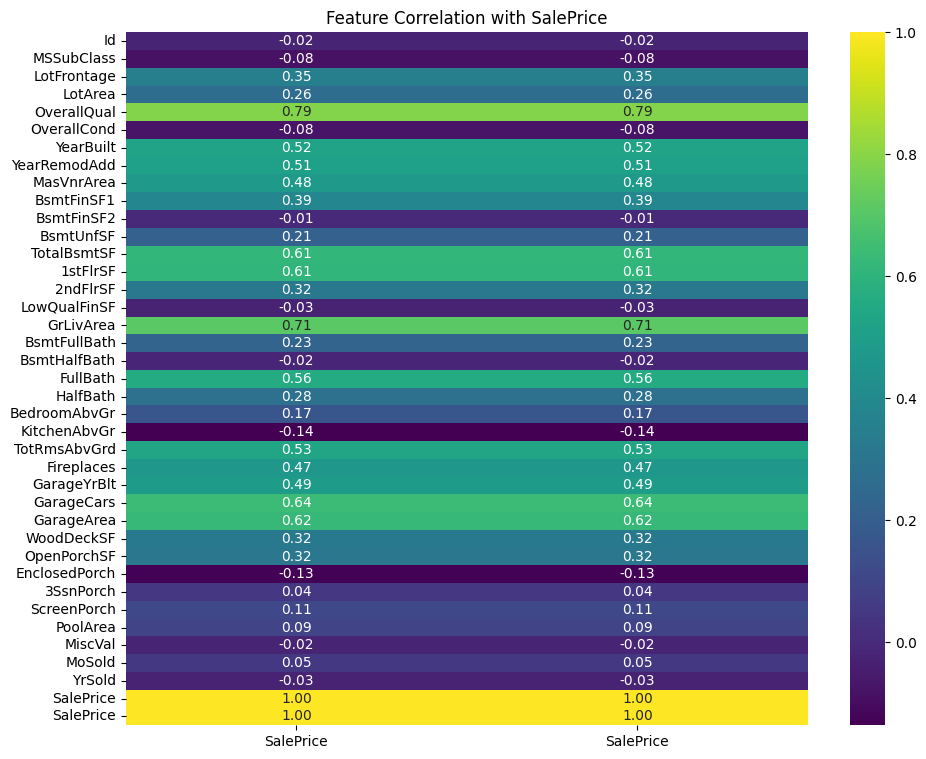

In [ ]:
1 # List of categorical columns to remove
categorical_columns = ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
                       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
                       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
                       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
                       'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
                       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
                       'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']

2 # Select numerical columns
numerical_columns = [col for col in House_Price_Data.columns if col not in categorical_columns and House_Price_Data[col].dtype != 'object']

3 # Create a DataFrame with only numerical features and the target variable
numerical_data = House_Price_Data[numerical_columns + ['SalePrice']]

4 # Calculate the correlation matrix
correlation_matrix = numerical_data.corr()

5 # Create a heatmap of the correlation
plt.figure(figsize=(11, 9))
sns.heatmap(correlation_matrix[['SalePrice']], annot=True, cmap='viridis', fmt='.2f')
plt.title('Feature Correlation with SalePrice')
plt.show()

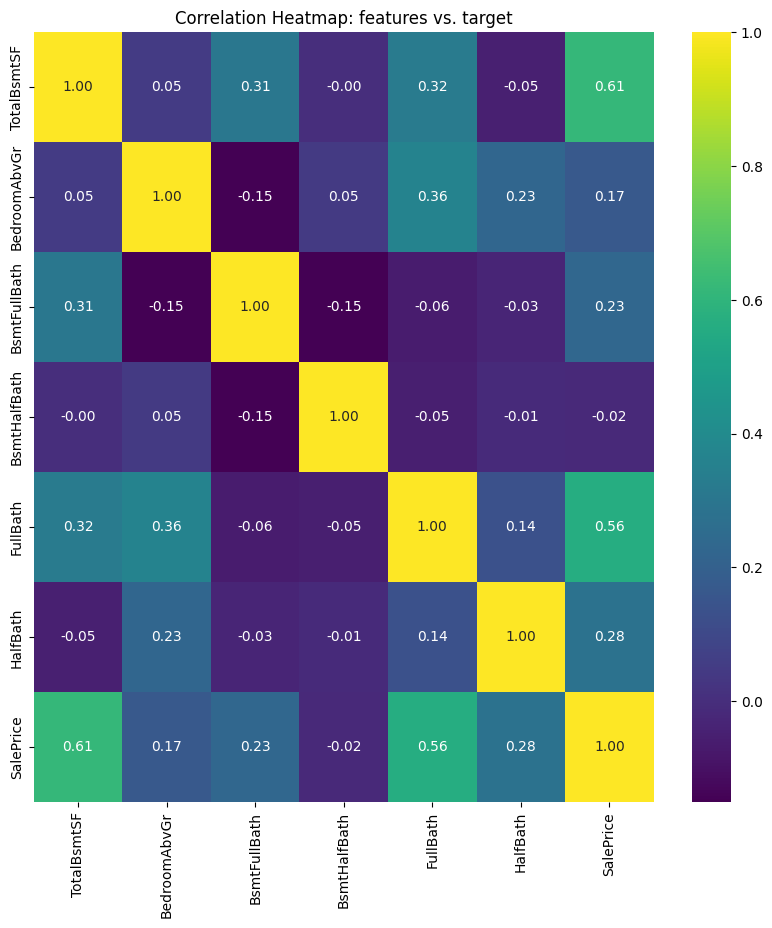

In [ ]:
1 # Split the dataset into training and testing sets
X = House_Price_Data[['TotalBsmtSF', 'BedroomAbvGr', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath']]
y = House_Price_Data['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

3 # Create a DataFrame with the selected columns
data_subset = pd.concat([X, y], axis = 1)

4 # Calculate the correlation matrix
correlation_matrix = data_subset.corr()

5 # Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt='.2f')
plt.title('Correlation Heatmap: features vs. target')
plt.show()

In [ ]:
1 # Inspect missing values in the training dataset
missing_values_train = House_Price_Data.isnull().sum()
print("Missing values in the training dataset:")
print(missing_values_train)

2 # Inspect missing values in the test dataset
missing_values_test = Test_Data.isnull().sum()
print("Missing values in the test dataset:")
print(missing_values_test)

Missing values in the training dataset:
Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64
Missing values in the test dataset:
Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64


In [ ]:
1 # Missing values in the selected features
features_with_missing_values = X.isnull().sum()
print("Missing values in the selected features:")
print(features_with_missing_values)

Missing values in the selected features:
TotalBsmtSF     0
BedroomAbvGr    0
BsmtFullBath    0
BsmtHalfBath    0
FullBath        0
HalfBath        0
dtype: int64


In [ ]:
1 # Create a linear regression model
model = LinearRegression()

2 # Fit the model to the training data
model.fit(X_train, y_train)
print(model)

LinearRegression()


In [ ]:
1 # Make prediction on the test data
y_pred = model.predict(X_test)

2 # Evalaute the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')


Mean Squared Error: 2693215363.50
R-squared: 0.65


In [ ]:
X.sample(5)

,TotalBsmtSF,BedroomAbvGr,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath
549,912,4,0,0,2,1
654,2109,2,1,0,2,1
626,978,3,0,0,1,0
468,1626,3,0,0,2,0
1412,0,2,0,0,2,0


In [ ]:
1 # Predict the price of a new house
new_house = np.array([[1650,4,1,0,3,1]])
predicted_price = model.predict(new_house)
print(f'Predicted price of the new house: ${predicted_price[0]:.2f}')

Predicted price of the new house: $339603.40


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



In [ ]:
1 # To investigate model performance, perform cross-validation
cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
cv_scores = -cv_scores
print(f'Cross-validation scores: {cv_scores}')
print(f'Mean cross-validation score: {cv_scores.mean():.2f}')

Cross-validation scores: [2.21252974e+09 2.26318133e+09 2.74594389e+09 1.92774838e+09
 3.74136324e+09]
Mean cross-validation score: 2578153316.39


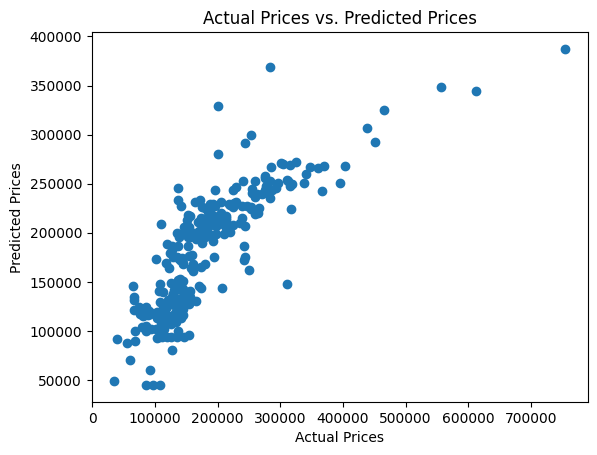

In [ ]:
1 # Create a scatter plot of actual prices vs. predicted prices
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs. Predicted Prices')
plt.show()